<a href="https://colab.research.google.com/github/EcoJorgeCh/Python/blob/main/Tarea_1_Macro_2ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import pandas as pd
import xlrd
import statsmodels.api as sm
import numpy as np
import seaborn as sb 
import matplotlib.pyplot as plt


In [2]:
from google.colab import files
load=files.upload()
data_frame_a = pd.read_excel(load['mpd2020.xlsx'], sheet_name='Full data', usecols="A:E", skiprows=327, nrows=144, header=None)

Saving mpd2020.xlsx to mpd2020.xlsx


In [3]:
data_frame_b = pd.read_excel(load['mpd2020.xlsx'], sheet_name='Full data', usecols="A:E", skiprows=1987, nrows=144, header=None)

In [4]:
data_frame_c = pd.read_excel(load['mpd2020.xlsx'], sheet_name='Full data', usecols="A:E", skiprows=2767, nrows=144, header=None)

In [5]:
data_frame_d = pd.read_excel(load['mpd2020.xlsx'], sheet_name='Full data', usecols="A:E", skiprows=12342, nrows=144, header=None)

In [6]:
data_frame_a = data_frame_a.reset_index(drop=True)
data_frame_b = data_frame_b.reset_index(drop=True)
data_frame_c = data_frame_c.reset_index(drop=True)
data_frame_d = data_frame_d.reset_index(drop=True)

# asignar nombres a las columnas
col_nombres = ["country", "country1", "year", "gdppc", "pop"]
data_frame_a.columns = col_nombres
data_frame_b.columns = col_nombres
data_frame_c.columns = col_nombres
data_frame_d.columns = col_nombres
data_frame_a['Log_GDP_pc'] = np.log(data_frame_a['gdppc'])
data_frame_b['Log_GDP_pc'] = np.log(data_frame_b['gdppc'])
data_frame_c['Log_GDP_pc'] = np.log(data_frame_c['gdppc'])
data_frame_d['Log_GDP_pc'] = np.log(data_frame_d['gdppc'])
data_frame_concat = pd.concat([data_frame_a, data_frame_b, data_frame_c, data_frame_d], axis=1)
print(data_frame_concat)

     country   country1  year       gdppc          pop Log_GDP_pc  country  \
0        ARG  Argentina  1875   2606.0000          NaN   7.865572      BRA   
1        ARG  Argentina  1876   2611.0000          NaN   7.867489      BRA   
2        ARG  Argentina  1877   2820.0000          NaN   7.944492      BRA   
3        ARG  Argentina  1878   2619.0000          NaN   7.870548      BRA   
4        ARG  Argentina  1879   2664.0000          NaN   7.887584      BRA   
..       ...        ...   ...         ...          ...        ...      ...   
139      ARG  Argentina  2014  19183.0000  43057.99302   9.861780      BRA   
140      ARG  Argentina  2015  19502.0000  43475.28135   9.878272      BRA   
141      ARG  Argentina  2016  18875.0000  43887.30861   9.845594      BRA   
142      ARG  Argentina  2017  19200.9061  44293.85881   9.862713      BRA   
143      ARG  Argentina  2018  18556.3831  44694.76893   9.828569      BRA   

     country1  year       gdppc  ...  year       gdppc         

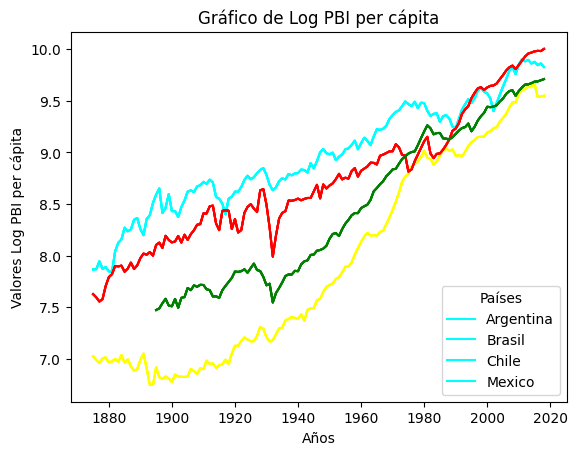

In [7]:
year = data_frame_concat['year']
# reexpresar PBI per capita en logaritmos y agregar una columna de estos datos
ln_gdp_a = data_frame_a['Log_GDP_pc']
ln_gdp_b = data_frame_b['Log_GDP_pc']
ln_gdp_c = data_frame_c['Log_GDP_pc']
ln_gdp_d = data_frame_d['Log_GDP_pc']

#graficar el PBI per capita en logaritmos vs años
fig, ax = plt.subplots()
#plt.scatter(year, ln_gdp, color="yellow")
#ax.plot('year', 'Log_GDP_pc', data=data_frame, color='red')
plt.plot(year,ln_gdp_a, color='cyan')
plt.plot(year,ln_gdp_b, color='yellow')
plt.plot(year,ln_gdp_c, color='red')
plt.plot(year,ln_gdp_d, color='green')
ax.set_xlabel('Años')
ax.set_ylabel('Valores Log PBI per cápita')
ax.set_title('Gráfico de Log PBI per cápita')
legend = plt.legend(['Argentina', 'Brasil', 'Chile', 'Mexico'], loc='lower right')
legend.set_title('Países')

In [12]:
trend = np.arange(0, 144)
X = sm.add_constant(trend)
regress_a = sm.OLS(data_frame_a['Log_GDP_pc'], X).fit()
regress_b = sm.OLS(data_frame_b['Log_GDP_pc'], X).fit()
regress_c = sm.OLS(data_frame_c['Log_GDP_pc'], X).fit()
regress_d = sm.OLS(data_frame_d['Log_GDP_pc'], X).fit()
print(regress_a.summary())
print(regress_b.summary())
print(regress_c.summary())
print(regress_d.summary())

                            OLS Regression Results                            
Dep. Variable:             Log_GDP_pc   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.949
Method:                 Least Squares   F-statistic:                     2644.
Date:                Thu, 13 Apr 2023   Prob (F-statistic):           1.12e-93
Time:                        13:38:03   Log-Likelihood:                 103.26
No. Observations:                 144   AIC:                            -202.5
Df Residuals:                     142   BIC:                            -196.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.0834      0.020    409.862      0.0

In [ ]:
regress_a = sm.OLS(data_frame_a['Log_GDP_pc'], X).fit()
regress_b = sm.OLS(data_frame_b['Log_GDP_pc'], X).fit()
regress_c = sm.OLS(data_frame_c['Log_GDP_pc'], X).fit()
regress_d = sm.OLS(data_frame_d['Log_GDP_pc'], X).fit()
results = regress.fit()
Log_GDP_est = results.predict(X)

Text(0, 0.5, 'Valores PBI per capita (estimado vs actual)')

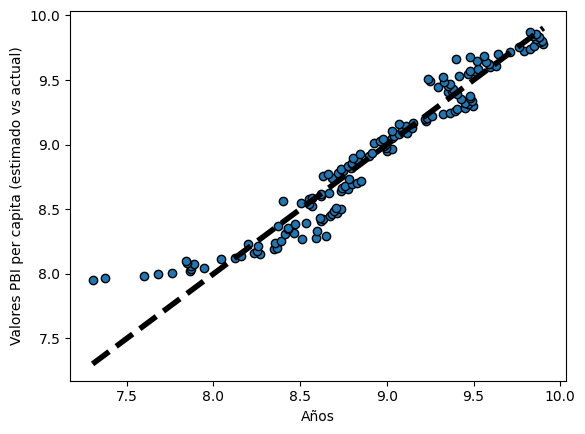

In [ ]:
fig, ax = plt.subplots()
ax.scatter(data_frame['Log_GDP_pc'], Log_GDP_est, edgecolors=(0, 0, 0))
ax.plot([data_frame['Log_GDP_pc'].min(), data_frame['Log_GDP_pc'].max()], [data_frame['Log_GDP_pc'].min(), data_frame['Log_GDP_pc'].max()], 'k--', lw=4)
ax.set_xlabel('Años')
ax.set_ylabel('Valores PBI per capita (estimado vs actual)')

In [ ]:
tick_years = range(1960, 2021, 10)
tick_labels = [str(year) for year in tick_years]
ax.set_xticks(data_frame['Log_GDP_pc'][::10])
ax.set_xticklabels(tick_labels)
plt.show()